# Tugas 4

- Nama  : Muhammad Aditya Bayhaqie
- NIM   : 09021282227122
- Kelas : TIREGL3

# Library Call

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import symbols, Eq, solve

# Data Visualization

## Soal 1

Diberikan data jumlah jam belajar dan nilai ujian matematika siswa sebagai berikut:

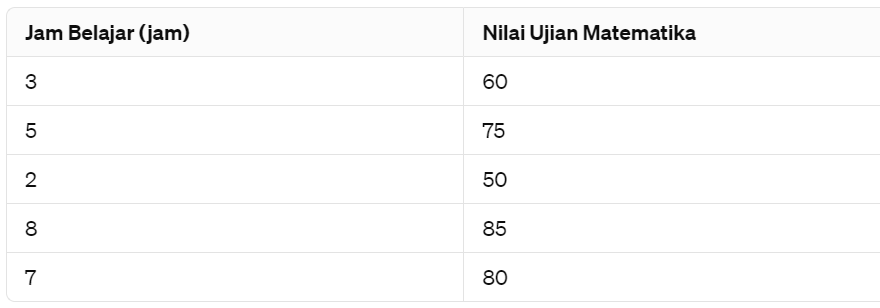

Buatlah scatter plot untuk menampilkan hubungan antara jumlah jam belajar dan nilai ujian matematika siswa!

Berdasarkan scatter plot yang Anda hasilkan, jelaskan apakah terdapat pola atau hubungan yang dapat diamati antara jumlah jam belajar dan nilai ujian matematika siswa!

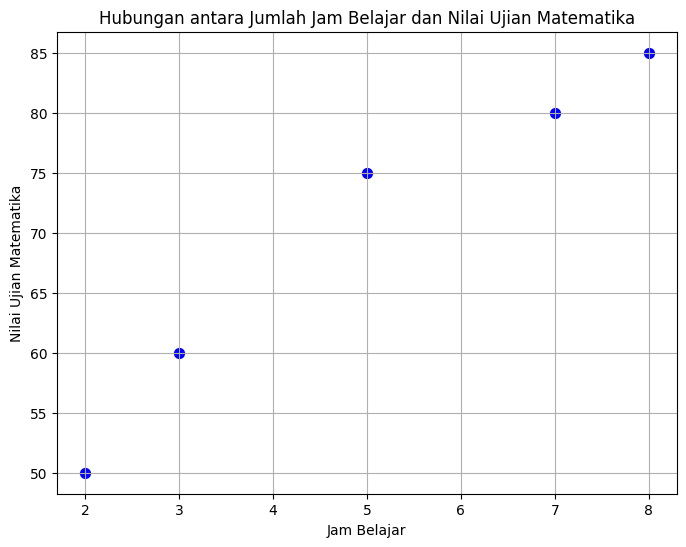

In [ ]:
# Data jumlah jam belajar dan nilai ujian matematika
jam_belajar = [3, 5, 2, 8, 7]
nilai_ujian = [60, 75, 50, 85, 80]

# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(jam_belajar, nilai_ujian, color='blue', marker='o', s=50)
plt.title('Hubungan antara Jumlah Jam Belajar dan Nilai Ujian Matematika')
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai Ujian Matematika')
plt.grid(True)
plt.show()

Berdasarkan scatter plot, terlihat adanya kecenderungan **Positif** antara jumlah jam belajar dan nilai ujian matematika.  Semakin banyak jam belajar siswa, semakin tinggi pula nilai ujian matematikanya.

Kita masih belum bisa menyimpulkan secara pasti karena kterbatasan data yang kita miliki

---

## Soal 2

Seorang guru ingin menganalisis distribusi nilai ujian matematika siswa dalam kelasnya. Dia ingin melihat seberapa bervariasinya nilai ujian tersebut serta mengidentifikasi adanya outlier dalam distribusi nilai tersebut. Diberikan data nilai ujian matematika siswa sebagai berikut:

[60, 75, 50, 85, 80, 65, 70, 90, 55, 95]

Buatlah box plot untuk menampilkan distribusi nilai ujian matematika siswa!

Berdasarkan box plot yang Anda hasilkan, jelaskan karakteristik distribusi nilai ujian matematika tersebut! Apakah terdapat outlier dalam distribusi nilai tersebut?

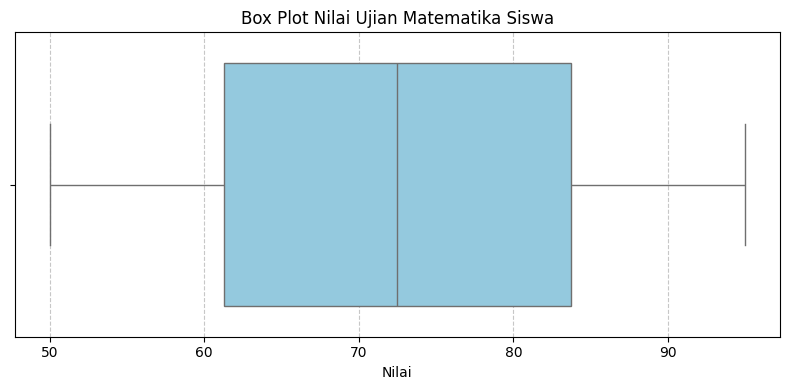

In [ ]:
# Data nilai ujian matematika siswa
nilai_ujian = [60, 75, 50, 85, 80, 65, 70, 90, 55, 95]

# Membuat box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=nilai_ujian, orient='h', color='skyblue')
plt.title("Box Plot Nilai Ujian Matematika Siswa")
plt.xlabel("Nilai")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Konversi data ke dalam panda
nilai_ujian_series = pd.Series(nilai_ujian)

# Gunakan fungsi describe() untuk menganalisis data
nilai_ujian_series.describe()

,0
count,10.000000
mean,72.500000
std,15.138252
min,50.000000
25%,61.250000
50%,72.500000
75%,83.750000
max,95.000000


Dari hasil dan visualisasi tersebut kita bisa menyimpulkan bahwa Tidak ada Outlier yang terdapat pada kumpulan data tersebut. Karena tidak ada data yang berada diluar `Q1 - 1.5 x IQR` hingga `Q3 - 1.5 x IQR`

---

## Soal 3

Dengan menggunakan dataset (‘https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'),

buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

Ukuran figure adalah 10x5
Sumbu-x adalah tanggal pembelian, dari tanggal 1–31 Desember 2019
Sumbu-y adalah jumlah unique customers di tiap tanggal
Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

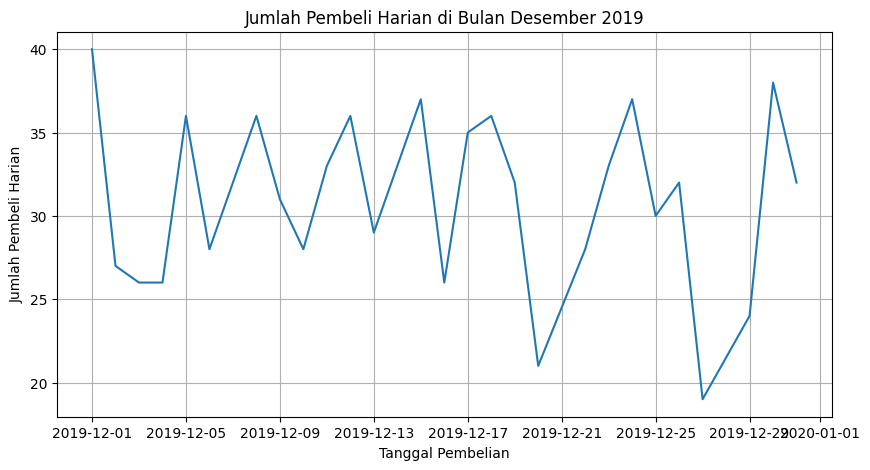

In [ ]:
# Load dataset
retail_data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Konversi `order_date` ke tipe data `datetime`
retail_data['order_date'] = pd.to_datetime(retail_data['order_date'])

# Filter data untuk bulan December 2019
december_data = retail_data[(retail_data['order_date'] >= '2019-12-01') & (retail_data['order_date'] <= '2019-12-31')]

# Group berdasarkan `order_date` dan `customer_id`
daily_customers = december_data.groupby('order_date')['customer_id'].nunique()

# Buat Line chart dengan spesifikasi yang diinginkan
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values)
plt.xlabel('Tanggal Pembelian')
plt.ylabel('Jumlah Pembeli Harian')
plt.title('Jumlah Pembeli Harian di Bulan Desember 2019')
plt.grid(True)
plt.show()

# Hitung Rata-rata

## Soal 1

Tabel 1 berisi data Panjang dibutuhkan oleh siswa? bahan yang dibutuhkan siswa untuk merancang pakaian pesta. Hitunglah berapa panjang rata-rata bahan

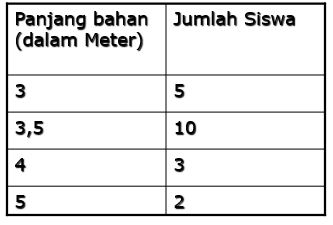

In [ ]:
# Buat Dataframe pada data
data = {'Panjang bahan (dalam Meter)': [3, 3.5, 4, 5],
        'Jumlah Siswa': [5, 10, 3, 2]}
df = pd.DataFrame(data)

# Hitung total Panjang dari seluruh data
df['Total Panjang'] = df['Panjang bahan (dalam Meter)'] * df['Jumlah Siswa']
total_panjang = df['Total Panjang'].sum()
total_siswa = df['Jumlah Siswa'].sum()
rata_rata_panjang = total_panjang / total_siswa

print(f"Panjang rata-rata bahan yang dibutuhkan siswa: {rata_rata_panjang} meter")

Panjang rata-rata bahan yang dibutuhkan siswa: 3.6 meter


## Soal 2

Tabel 2 memperlihatkan banyaknya buah mangga yang dihasilkan. Berapakah x dan berapa banyk musim yang dilalui jika rata-rata pohon tersebut menghasilkan 49 buah?

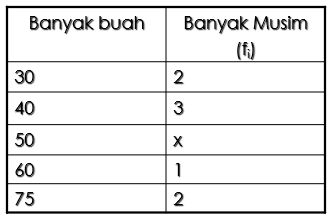

In [ ]:
# Data diketahui
total_buah_dikenal = 30*2 + 40*3 + 60*1 + 75*2  # 390
total_frek_dikenal = 2 + 3 + 1 + 2  # 8
target_rata_rata = 49

# Uji nilai x hingga ketemu hasil rata-rata 49
for x in range(1, 20):
    rata = (390 + 50 * x) / (8 + x)
    if round(rata, 2) == 49:
        solusi_x = x
        break

# Hitung total musim
total_musim = total_frek_dikenal + solusi_x

# Output hasil
print(f"Banyak Musim yang memiliki 50 Buah adalah {solusi_x} Musim")
print(f"Sehingga total Musim adalah {total_musim} Musim")

Banyak Musim yang memiliki 50 Buah adalah 2 Musim
Sehingga total Musim adalah 10 Musim


# Median

## Soal 1

Seorang petani melakukan pengukuran ketinggian tanaman tomat setiap minggu selama dua bulan terakhir. Dia mencatat data pengukuran ketinggian tanaman setiap minggu dan ingin mengetahui nilai median ketinggian tanaman tersebut.

Bulan pertama:

- Minggu 1: 10 cm
- Minggu 2: 12 cm
- Minggu 3: 15 cm
- Minggu 4: 11 cm

Bulan kedua:

- Minggu 1: 14 cm
- Minggu 2: 13 cm
- Minggu 3: 16 cm
- Minggu 4: 12 cm

In [ ]:
# Data ketinggian tanaman tomat
ketinggian_tanaman = [10, 12, 15, 11, 14, 13, 16, 12]

# Hitung median
median_ketinggian = np.median(ketinggian_tanaman)

# Output hasil
print(f"Nilai median ketinggian tanaman tomat adalah: {median_ketinggian} cm")

Nilai median ketinggian tanaman tomat adalah: 12.5 cm


## Soal 2

Sebuah sekolah melakukan pengukuran ketinggian siswa dalam sebuah kelas. Data ketinggian siswa tersebut dikelompokkan ke dalam rentang ketinggian tertentu.

Rentang ketinggian:

- Kelompok 1: 150 - 155 cm
- Kelompok 2: 156 - 160 cm
- Kelompok 3: 161 - 165 cm
- Kelompok 4: 166 - 170 cm
- Kelompok 5: 171 - 175 cm

Frekuensi ketinggian siswa dalam kelompok tersebut:

- Kelompok 1: 5 siswa
- Kelompok 2: 8 siswa
- Kelompok 3: 12 siswa
- Kelompok 4: 10 siswa
- Kelompok 5: 6 siswa

In [ ]:
# Data
kelas = [(150, 155), (156, 160), (161, 165), (166, 170), (171, 175)]
frekuensi = [5, 8, 12, 10, 6]

# Hitung titik tengah tiap kelas
median = [(b + t) / 2 for b, t in kelas]

# Hitung total frekuensi
total_f = sum(frekuensi)

# Hitung rata-rata
jumlah_fx = sum(f * x for f, x in zip(frekuensi, median))
mean = jumlah_fx / total_f

# Output
print("Median:", median)
print("Jumlah f·x:", jumlah_fx)
print("Rata-rata Tinggi siswa:", round(mean, 2))

Median: [152.5, 158.0, 163.0, 168.0, 173.0]
Jumlah f·x: 6700.5
Rata-rata Tinggi siswa: 163.43


# Probabilitas

Seorang penjual bunga memiliki dua jenis bunga yang sering dijual: mawar merah dan mawar putih. Dia ingin memprediksi kemungkinan penjualan bunga merah atau putih pada hari tertentu berdasarkan data historis penjualan.

Dari catatan penjualan sebelumnya, didapatkan informasi bahwa dalam 100 hari terakhir:

- Bunga merah terjual sebanyak 60 hari.
- Bunga putih terjual sebanyak 40 hari.

Kadang-kadang, penjual juga menjual kedua jenis bunga pada hari yang sama.
Tujuan dari contoh kasus ini adalah untuk menghitung probabilitas penjualan bunga merah, bunga putih, atau keduanya pada hari berikutnya berdasarkan data historis penjualan.

Menghitung probabilitas penjualan bunga merah pada hari berikutnya. Menghitung probabilitas penjualan bunga putih pada hari berikutnya. Menghitung probabilitas penjualan keduanya pada hari berikutnya. Memeriksa apakah probabilitas yang dihitung memenuhi properti probabilitas (yaitu, total probabilitas harus sama dengan 1).

In [ ]:
# Probabilitas penjualan bunga merah
probabilitas_merah = 60 / 100

# Probabilitas penjualan bunga putih
probabilitas_putih = 40 / 100

# Asumsikan penjualan bunga merah dan putih independen
# Probabilitas penjualan keduanya
probabilitas_keduanya = probabilitas_merah * probabilitas_putih

# Total probabilitas
total_probabilitas = probabilitas_merah + probabilitas_putih - probabilitas_keduanya

print(f"Probabilitas penjualan bunga merah: {probabilitas_merah}")
print(f"Probabilitas penjualan bunga putih: {probabilitas_putih}")
print(f"Probabilitas penjualan bunga merah dan putih: {probabilitas_keduanya}")
print(f"Total Probabilitas: {total_probabilitas}")


Probabilitas penjualan bunga merah: 0.6
Probabilitas penjualan bunga putih: 0.4
Probabilitas penjualan bunga merah dan putih: 0.24
Total Probabilitas: 0.76


## Soal 2

Sebuah perusahaan memiliki dua pabrik, Pabrik A dan Pabrik B, yang memproduksi komputer. Perusahaan tersebut ingin memahami probabilitas keberhasilan produksi komputer di masing-masing pabrik.

Dari catatan historis, diperoleh informasi sebagai berikut:

- Pabrik A memiliki tingkat keberhasilan produksi komputer sebesar 90%.
- Pabrik B memiliki tingkat keberhasilan produksi komputer sebesar 85%.

Perusahaan menentukan bahwa 60% dari keseluruhan produksi berasal dari Pabrik A dan sisanya dari Pabrik B.

Tujuan dari contoh kasus ini adalah untuk menghitung probabilitas bahwa sebuah komputer yang diproduksi oleh perusahaan tersebut berasal dari Pabrik A, berasal dari Pabrik B, atau berhasil diproduksi di masing-masing pabrik.

Menghitung probabilitas bahwa sebuah komputer diproduksi oleh Pabrik A atau Pabrik B. Menghitung probabilitas bahwa sebuah komputer berhasil diproduksi di masing-masing pabrik. Menggunakan aturan perkalian dan aturan penjumlahan untuk menghitung probabilitas gabungan.

In [ ]:
# Probabilitas pabrik
P_A = 0.6
P_B = 0.4

# Probabilitas keberhasilan produksi
P_sukses_A = 0.9
P_sukses_B = 0.85

# Probabilitas komputer berasal dari Pabrik A atau Pabrik B
print(f"Probabilitas komputer berasal dari Pabrik A: {P_A}")
print(f"Probabilitas komputer berasal dari Pabrik B: {P_B}")

# Probabilitas komputer berhasil diproduksi di masing-masing pabrik
P_sukses_dan_A = P_A * P_sukses_A
P_sukses_dan_B = P_B * P_sukses_B

print(f"Probabilitas komputer berhasil diproduksi di Pabrik A: {P_sukses_dan_A}")
print(f"Probabilitas komputer berhasil diproduksi di Pabrik B: {P_sukses_dan_B}")

# Probabilitas total keberhasilan produksi
P_sukses_total = P_sukses_dan_A + P_sukses_dan_B

print(f"Probabilitas total keberhasilan produksi: {P_sukses_total}")

Probabilitas komputer berasal dari Pabrik A: 0.6
Probabilitas komputer berasal dari Pabrik B: 0.4
Probabilitas komputer berhasil diproduksi di Pabrik A: 0.54
Probabilitas komputer berhasil diproduksi di Pabrik B: 0.34
Probabilitas total keberhasilan produksi: 0.8800000000000001


***Semper ad Meliora***